<a href="https://colab.research.google.com/github/DrashtiSanjayShah/Student-mark-Prediction/blob/main/Student_Marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOADING DATASET


In [ ]:
df = pd.read_csv('/content/student_info.csv')

In [ ]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.tail(10)

,study_hours,student_marks
190,5.79,73.14
191,5.22,70.51
192,8.71,84.03
193,7.55,79.64
194,6.35,74.24
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [ ]:
df.shape

(200, 2)

DISCOVERING and VISUALIZING DATA

In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


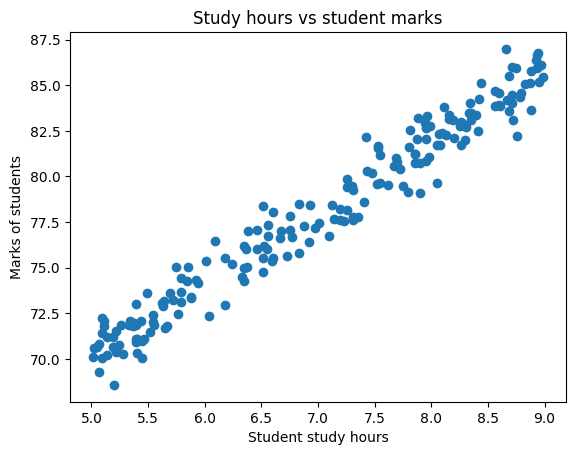

In [ ]:
plt.scatter(x=df .study_hours, y=df .student_marks)
plt.xlabel("Student study hours")  # Use function call instead of assignment
plt.ylabel('Marks of students')     # Use function call instead of assignment
plt.title('Study hours vs student marks')  # Use function call instead of assignment
plt.show()


DATA PREPARATION

In [ ]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
data = df.fillna(df.mean())

In [ ]:
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
data.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
X = data.drop('student_marks', axis = 'columns')
y = df.drop('study_hours', axis = 'columns')
print('shape of X = ', X.shape)
print('shape of y = ', y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [ ]:
X.head()

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=51)
print('shape of X_train = ', X_train.shape)
print('shape of y_train = ', y_train.shape)
print('shape of X_test = ', X_test.shape)
print('shape of y_test = ', y_test.shape)

shape of X_train =  (140, 1)
shape of y_train =  (140, 1)
shape of X_test =  (60, 1)
shape of y_test =  (60, 1)


TRAINING A MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
  #this gives value of m

array([[3.9391835]])

In [ ]:
lr.intercept_ #this is the value of c

array([50.47174682])

In [ ]:
m = 3.939
c = 50.47
y = m*6 + c
y

74.104

In [ ]:
lr.predict([[6]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.11

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[83.16696985],
       [78.95204351],
       [84.62446774],
       [85.88500646],
       [84.78203508],
       [80.80345975],
       [72.88570092],
       [71.70394587],
       [73.27961927],
       [71.70394587],
       [73.51597028],
       [76.43096607],
       [73.27961927],
       [73.63414578],
       [83.00940251],
       [70.44340715],
       [73.27961927],
       [78.79447617],
       [75.60373753],
       [82.73365966],
       [76.70670891],
       [70.52219082],
       [74.81590083],
       [78.03007256],
       [85.64865545],
       [82.61548416],
       [76.4703579 ],
       [85.09716976],
       [78.43994965],
       [81.43372911],
       [81.78825562],
       [83.20636168],
       [82.26095764],
       [81.15798626],
       [73.63414578],
       [71.19185201],
       [71.94029688],
       [81.59129645],
       [72.64934991],
       [71.97968871],
       [70.91610917],
       [81.94582296],
       [80.88224342],
       [83.16696985],
       [85.45169628],
       [77

In [ ]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['study hours','student_marks_orginal', 'student_marks_predction'])


,study hours,student_marks_orginal,student_marks_predction
0,8.300000,82.02,83.166970
1,7.230000,77.55,78.952044
2,8.670000,84.19,84.624468
3,8.990000,85.46,85.885006
4,8.710000,84.03,84.782035
5,7.700000,80.81,80.803460
6,5.690000,73.61,72.885701
7,5.390000,70.90,71.703946
8,5.790000,73.14,73.279619
9,5.390000,73.02,71.703946


In [ ]:
lr.score(X_test,y_test)

0.9524931690615

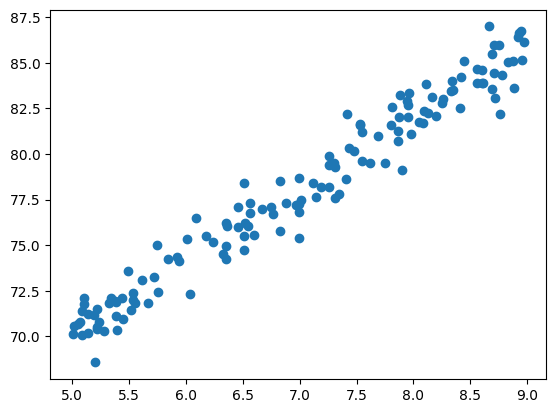

In [ ]:
plt.scatter(X_train,y_train)

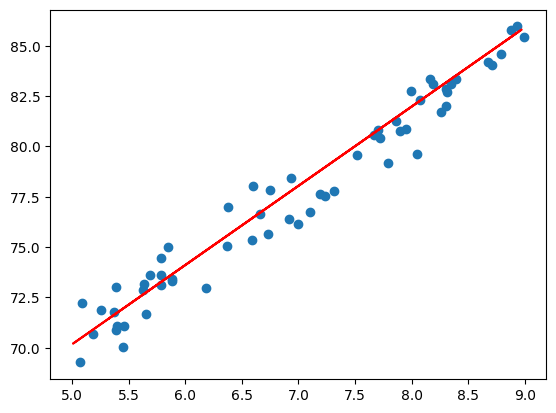

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train),color='r')

SAVING MODEL

In [ ]:
import joblib
joblib.dump(lr, 'Student_mark+predictor_(LR).pkl')

['Student_mark+predictor_(LR).pkl']

In [ ]:
model = joblib.load("Student_mark+predictor_(LR).pkl")

In [ ]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.16766430501457

In [ ]:
model.feature_names_in_

array(['study_hours'], dtype=object)